In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from glob import glob
import math
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# US

In [ ]:
sourcedict = {}
sepdict = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_US/2020_*/Senti Result/*'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          if urli[2] not in sourcedict.keys():
            sourcedict[urli[2]]=[sentiment]
            sepdict[urli[2]]=[(pf,nf)]
          else:
            sourcedict[urli[2]].append(sentiment)
            sepdict[urli[2]].append((pf,nf))

  

In [ ]:
sentavgs, ncount = [],[]
avgdict = {}
for key, value in sourcedict.items():
  if len(value)>0:
    sentavgs.append(np.average(value))
    ncount.append(len(value))
    avgdict[key] = np.average(value)

In [ ]:
'''import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(6,3), dpi=300)
plt.scatter(sentavgs,ncount, alpha=0.3)'''

"import matplotlib.pyplot as plt\nplt.style.use('ggplot')\n\nplt.figure(figsize=(6,3), dpi=300)\nplt.scatter(sentavgs,ncount, alpha=0.3)"

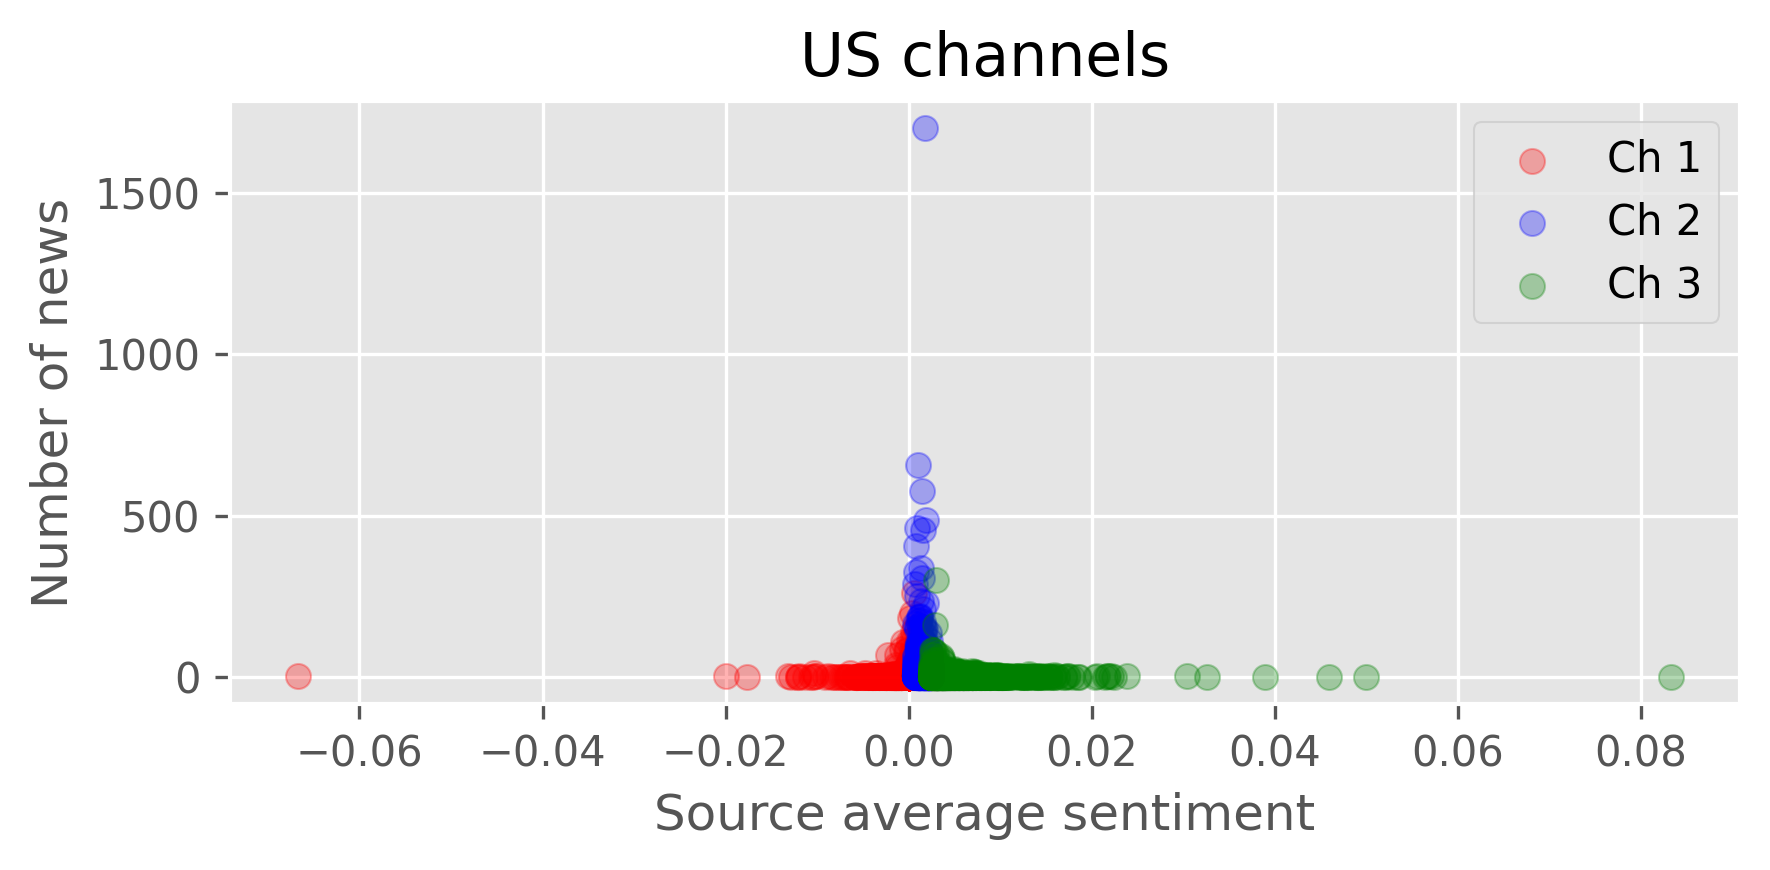

In [ ]:
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
plt.style.use('ggplot')
sortorder = np.argsort(sentavgs)
plt.figure(figsize=(6,3), dpi=300)
plt.scatter([sentavgs[i] for i in sortorder][:b1],[ncount[i] for i in sortorder][:b1], alpha=0.3, c='r', label='Ch 1')
plt.scatter([sentavgs[i] for i in sortorder][b1:b2],[ncount[i] for i in sortorder][b1:b2], alpha=0.3, c='b', label='Ch 2')
plt.scatter([sentavgs[i] for i in sortorder][b2:],[ncount[i] for i in sortorder][b2:], alpha=0.3, c='g', label='Ch 3')
plt.xlabel('Source average sentiment')
plt.ylabel('Number of news')
plt.legend()
plt.title('US channels')
plt.tight_layout()

plt.savefig('drive/My Drive/US_channels.png')

In [ ]:
'''
Expert channels as separate list
'''
expertchannel = []

expertstems = ['cdc', 'nih', 'hopkins', '.edu']
#Manual part
for i in avgdict.keys():
  for j in expertstems:
    if j in i:
      expertchannel.append(i)
      #print(i)
  

In [ ]:
'''
Binning the channels into 3 + expert

'''
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
sortdict = {k: v for k, v in sorted(avgdict.items(), key=lambda item: item[1])}
sourcelist = list(sortdict.keys())
counter = 1
source2ch = {}
for i in range(len(sourcelist)):
  if sourcelist[i] not in expertchannel:
    source2ch[sourcelist[i]] = counter
  if i > b1*counter:
    counter+=1

for i in expertchannel:
  source2ch[i] = 'E'

In [ ]:
timelines = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_US/2020_*/Senti Result/*'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          ndate = int(str(row['Date']).replace('filtered_',''))
          if ndate not in timelines.keys():
            timelines[ndate] = {'E':[],1:[],2:[],3:[]}
          timelines[ndate][source2ch[urli[2]]].append(sentiment)

In [ ]:
import json
with open('drive/My Drive/US_channels.json', 'w') as fp:
  json.dump(timelines, fp)

In [ ]:
#Save the avgs etc.

sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/US_processed.csv')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


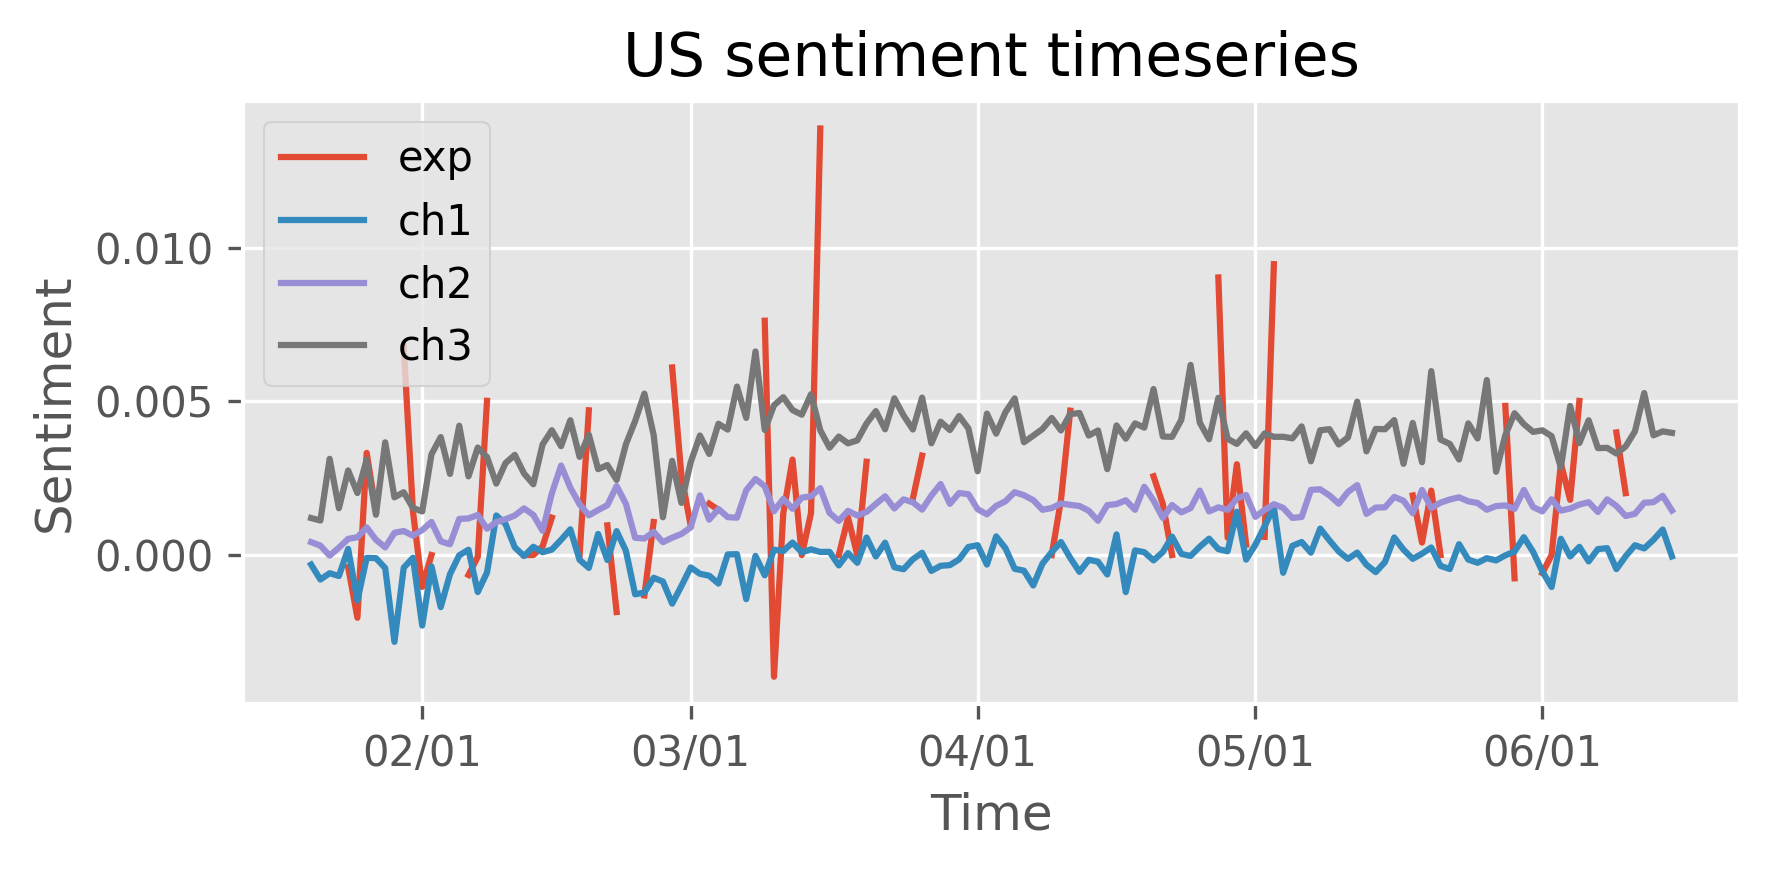

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('US sentiment timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chavgs:
  plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend(loc='upper left')
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/US_timeseries.png')

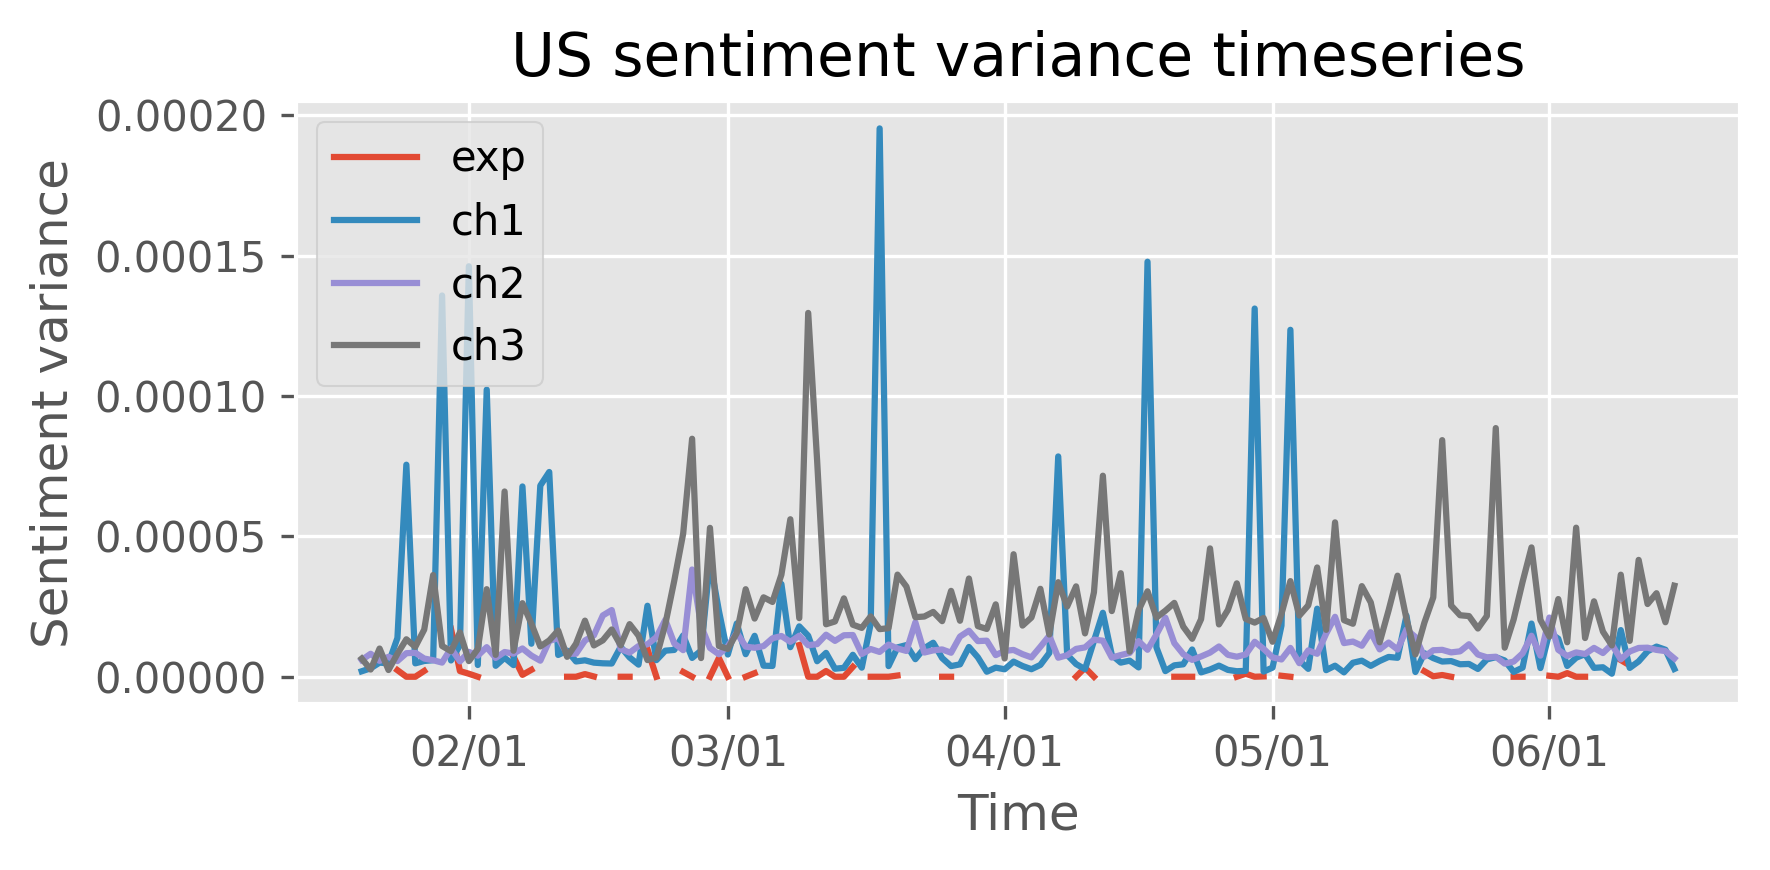

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment variance')
plt.title('US sentiment variance timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chvars:
  plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend(loc='upper left')
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/US_timeseries_var.png')

# Germany

In [ ]:
sourcedict = {}
sepdict = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_GM/2020_*/Senti Result/*'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          if urli[2] not in sourcedict.keys():
            sourcedict[urli[2]]=[sentiment]
            sepdict[urli[2]]=[(pf,nf)]
          else:
            sourcedict[urli[2]].append(sentiment)
            sepdict[urli[2]].append((pf,nf))

sentavgs, ncount = [],[]
avgdict = {}
for key, value in sourcedict.items():
  if len(value)>0:
    sentavgs.append(np.average(value))
    ncount.append(len(value))
    avgdict[key] = np.average(value)

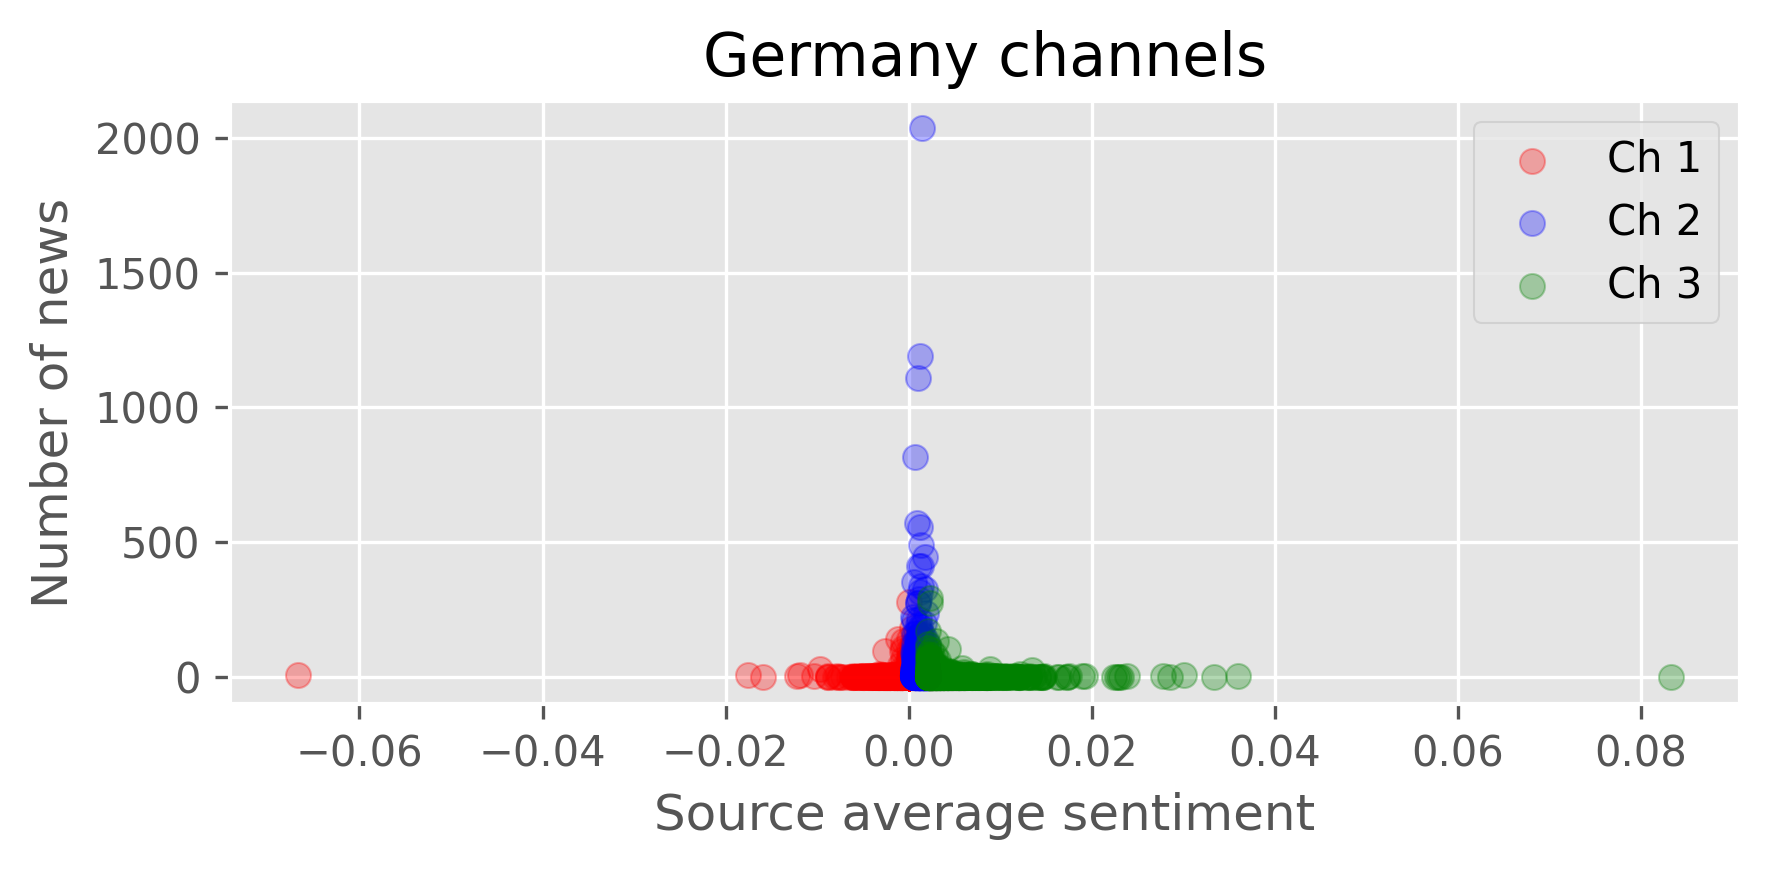

In [ ]:
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
plt.style.use('ggplot')
sortorder = np.argsort(sentavgs)
plt.figure(figsize=(6,3), dpi=300)
plt.scatter([sentavgs[i] for i in sortorder][:b1],[ncount[i] for i in sortorder][:b1], alpha=0.3, c='r', label='Ch 1')
plt.scatter([sentavgs[i] for i in sortorder][b1:b2],[ncount[i] for i in sortorder][b1:b2], alpha=0.3, c='b', label='Ch 2')
plt.scatter([sentavgs[i] for i in sortorder][b2:],[ncount[i] for i in sortorder][b2:], alpha=0.3, c='g', label='Ch 3')
plt.xlabel('Source average sentiment')
plt.ylabel('Number of news')
plt.legend()
plt.title('Germany channels')
plt.tight_layout()

plt.savefig('drive/My Drive/GER_channels.png')

In [ ]:
'''
Binning the channels into 3 + expert

'''
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
sortdict = {k: v for k, v in sorted(avgdict.items(), key=lambda item: item[1])}
sourcelist = list(sortdict.keys())
counter = 1
source2ch = {}
for i in range(len(sourcelist)):
  #if sourcelist[i] not in expertchannel:
  source2ch[sourcelist[i]] = counter
  if i > b1*counter:
    counter+=1

#for i in expertchannel:
#  source2ch[i] = 'E'

In [ ]:
timelines = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_GM/2020_*/Senti Result/*'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          ndate = int(str(row['Date']).replace('filtered_',''))
          if ndate not in timelines.keys():
            timelines[ndate] = {'E':[],1:[],2:[],3:[]}
          timelines[ndate][source2ch[urli[2]]].append(sentiment)

In [ ]:
with open('drive/My Drive/GER_channels.json', 'w') as fp:
  json.dump(timelines, fp)

#Save the avgs etc.

sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/GER_processed.csv')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


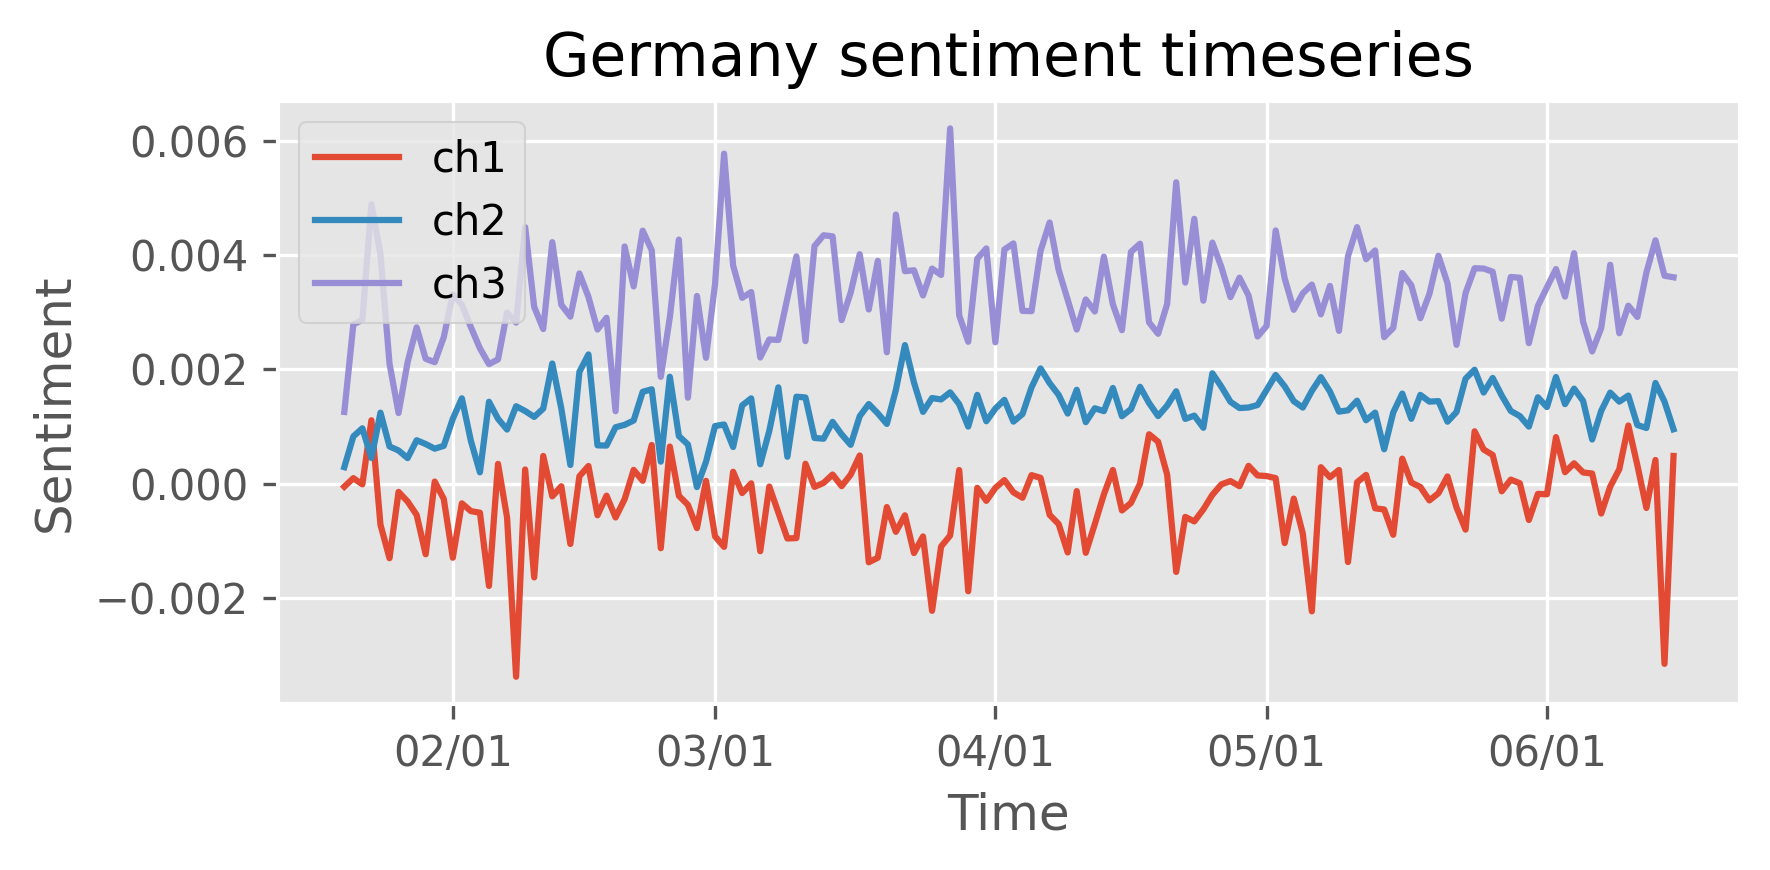

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Germany sentiment timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chavgs:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/GER_timeseries.png')

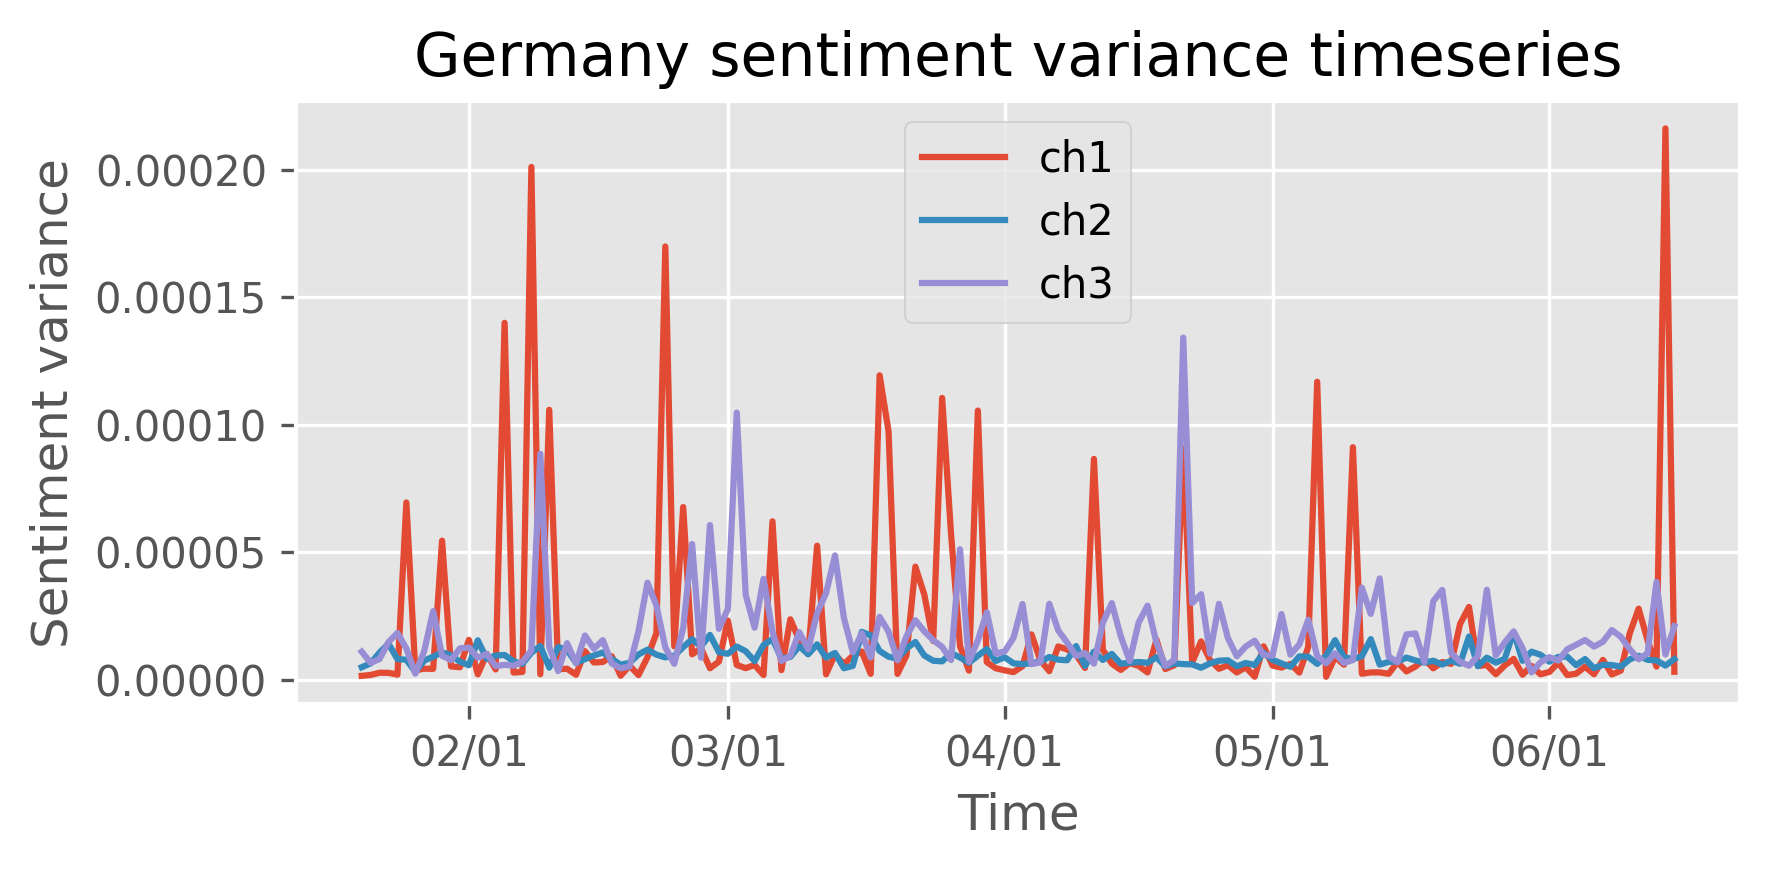

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment variance')
plt.title('Germany sentiment variance timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chvars:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/GER_timeseries_var.png')

# KOREA

In [ ]:
sourcedict = {}
sepdict = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_South korea/SENTIMENT /SENTI_DAY WISE*/*.csv'):
  #with open(i, 'r') as readfile:
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          if urli[2] not in sourcedict.keys():
            sourcedict[urli[2]]=[sentiment]
            sepdict[urli[2]]=[(pf,nf)]
          else:
            sourcedict[urli[2]].append(sentiment)
            sepdict[urli[2]].append((pf,nf))

sentavgs, ncount = [],[]
avgdict = {}
for key, value in sourcedict.items():
  if len(value)>0:
    sentavgs.append(np.average(value))
    ncount.append(len(value))
    avgdict[key] = np.average(value)

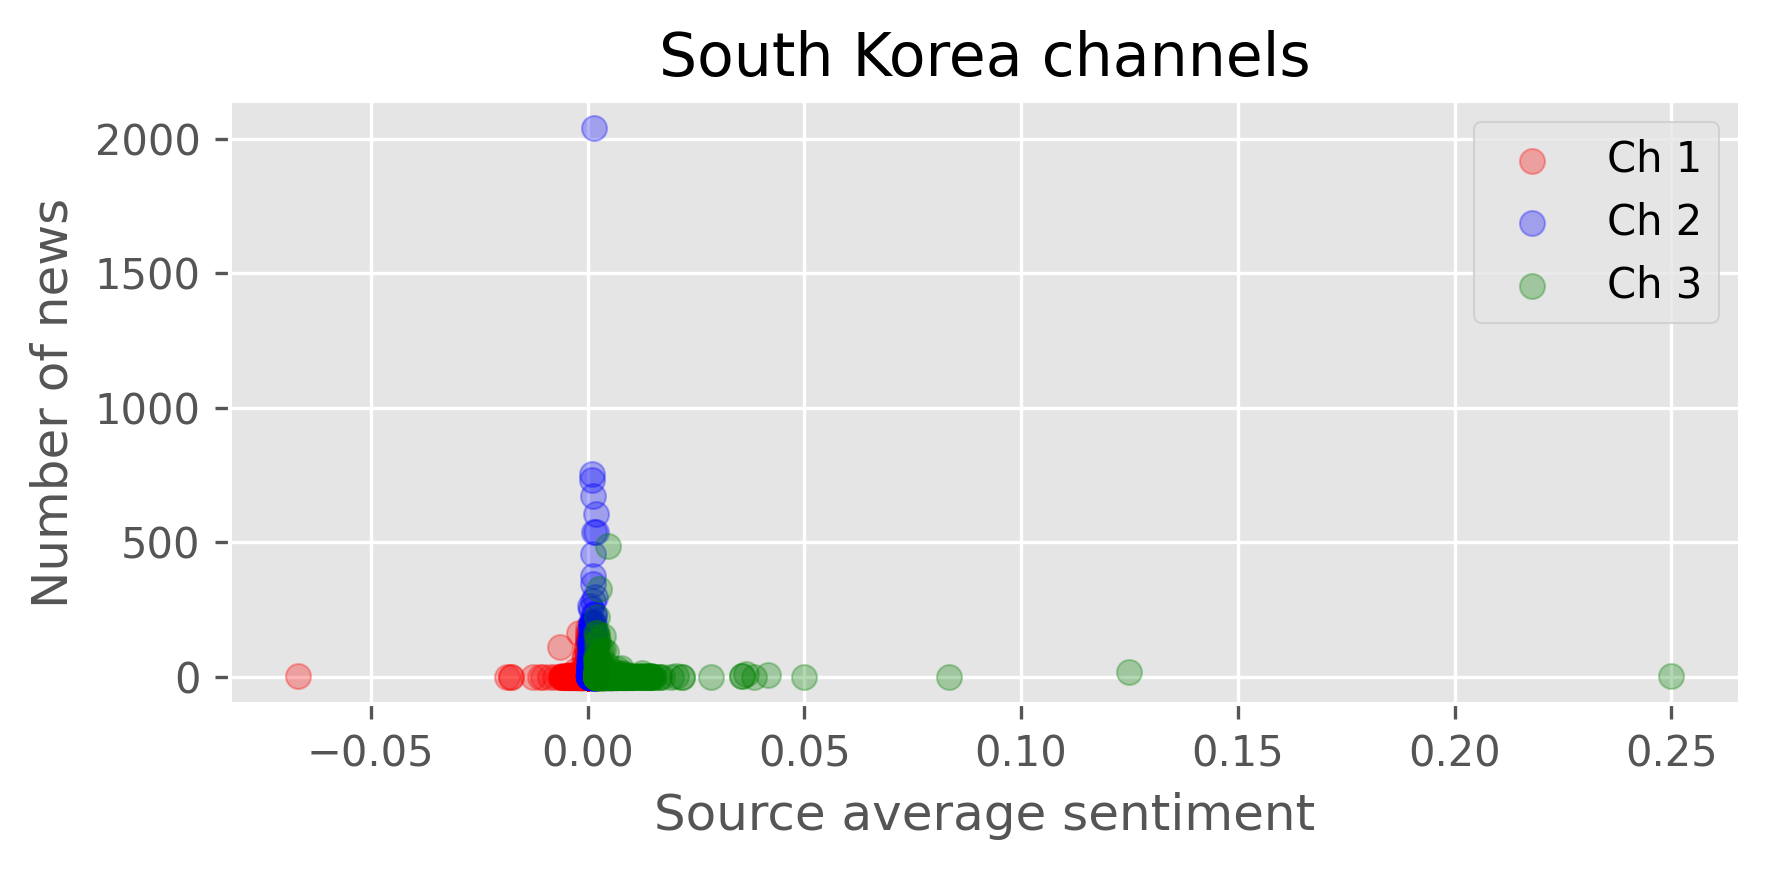

In [ ]:
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
plt.style.use('ggplot')
sortorder = np.argsort(sentavgs)
plt.figure(figsize=(6,3), dpi=300)
plt.scatter([sentavgs[i] for i in sortorder][:b1],[ncount[i] for i in sortorder][:b1], alpha=0.3, c='r', label='Ch 1')
plt.scatter([sentavgs[i] for i in sortorder][b1:b2],[ncount[i] for i in sortorder][b1:b2], alpha=0.3, c='b', label='Ch 2')
plt.scatter([sentavgs[i] for i in sortorder][b2:],[ncount[i] for i in sortorder][b2:], alpha=0.3, c='g', label='Ch 3')
plt.xlabel('Source average sentiment')
plt.ylabel('Number of news')
plt.legend()
plt.title('South Korea channels')
plt.tight_layout()

plt.savefig('drive/My Drive/KOR_channels.png')

In [ ]:
'''
Binning the channels into 3 + expert

'''
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
sortdict = {k: v for k, v in sorted(avgdict.items(), key=lambda item: item[1])}
sourcelist = list(sortdict.keys())
counter = 1
source2ch = {}
for i in range(len(sourcelist)):
  #if sourcelist[i] not in expertchannel:
  source2ch[sourcelist[i]] = counter
  if i > b1*counter:
    counter+=1

#for i in expertchannel:
#  source2ch[i] = 'E'

timelines = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_South korea/SENTIMENT /SENTI_DAY WISE*/*.csv'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          ndate = int(str(row['Date']).replace('filtered_',''))
          if ndate not in timelines.keys():
            timelines[ndate] = {'E':[],1:[],2:[],3:[]}
          timelines[ndate][source2ch[urli[2]]].append(sentiment)

with open('drive/My Drive/KOR_channels.json', 'w') as fp:
  json.dump(timelines, fp)

#Save the avgs etc.

sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/KOR_processed.csv')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


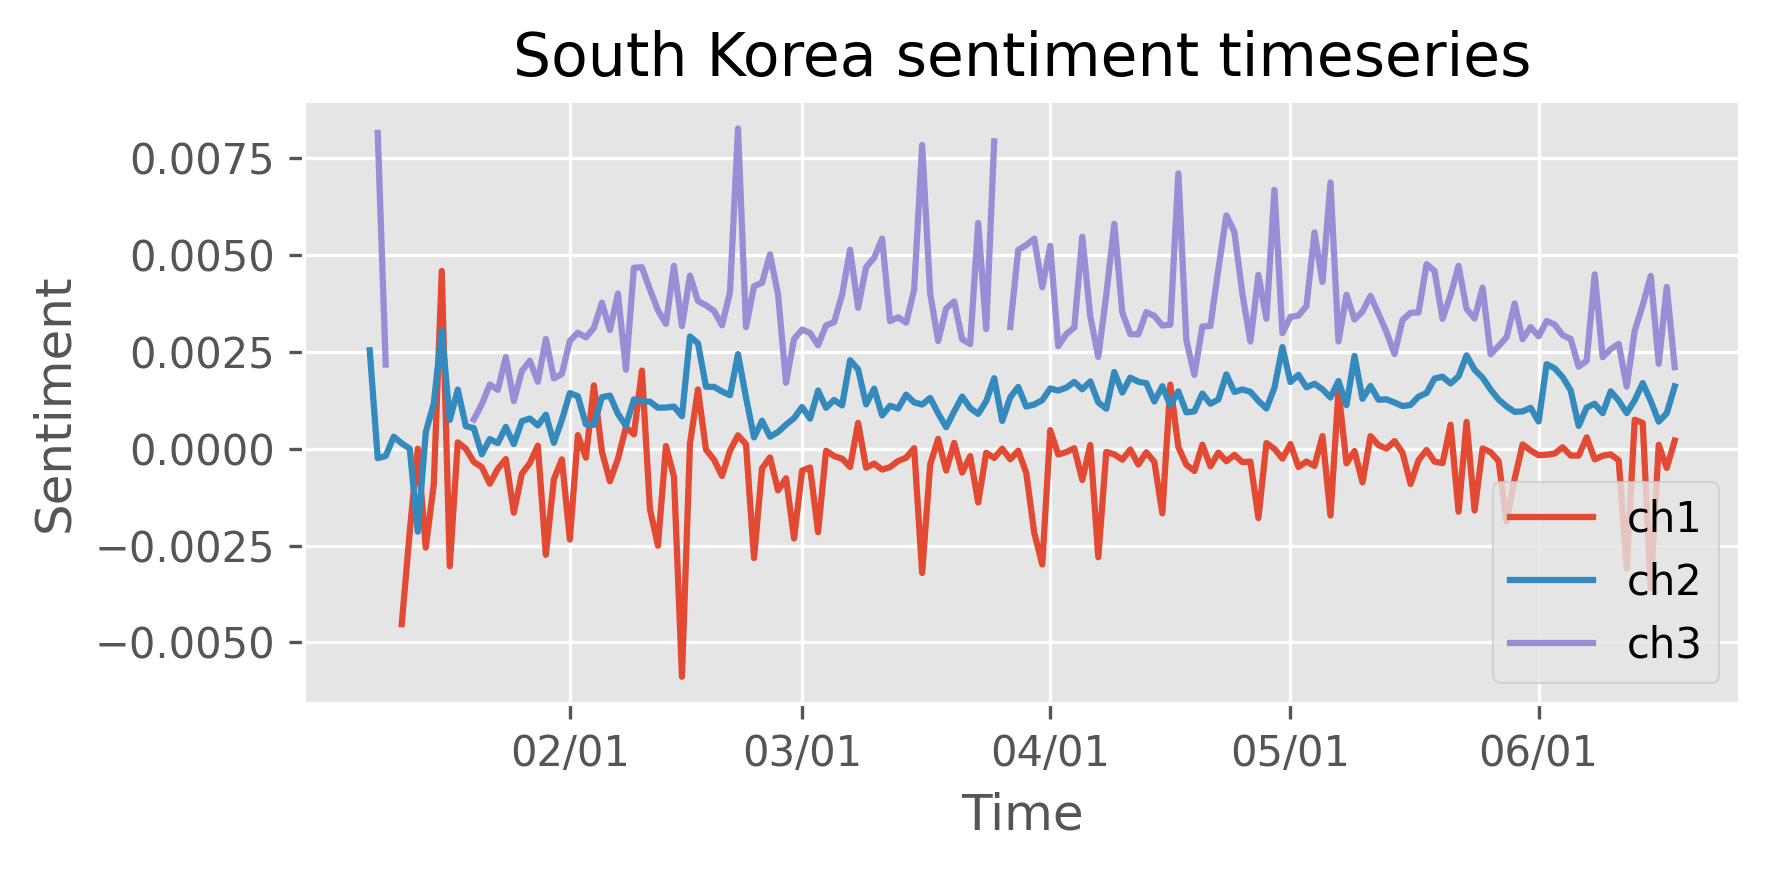

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('South Korea sentiment timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chavgs:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/KOR_timeseries.png')

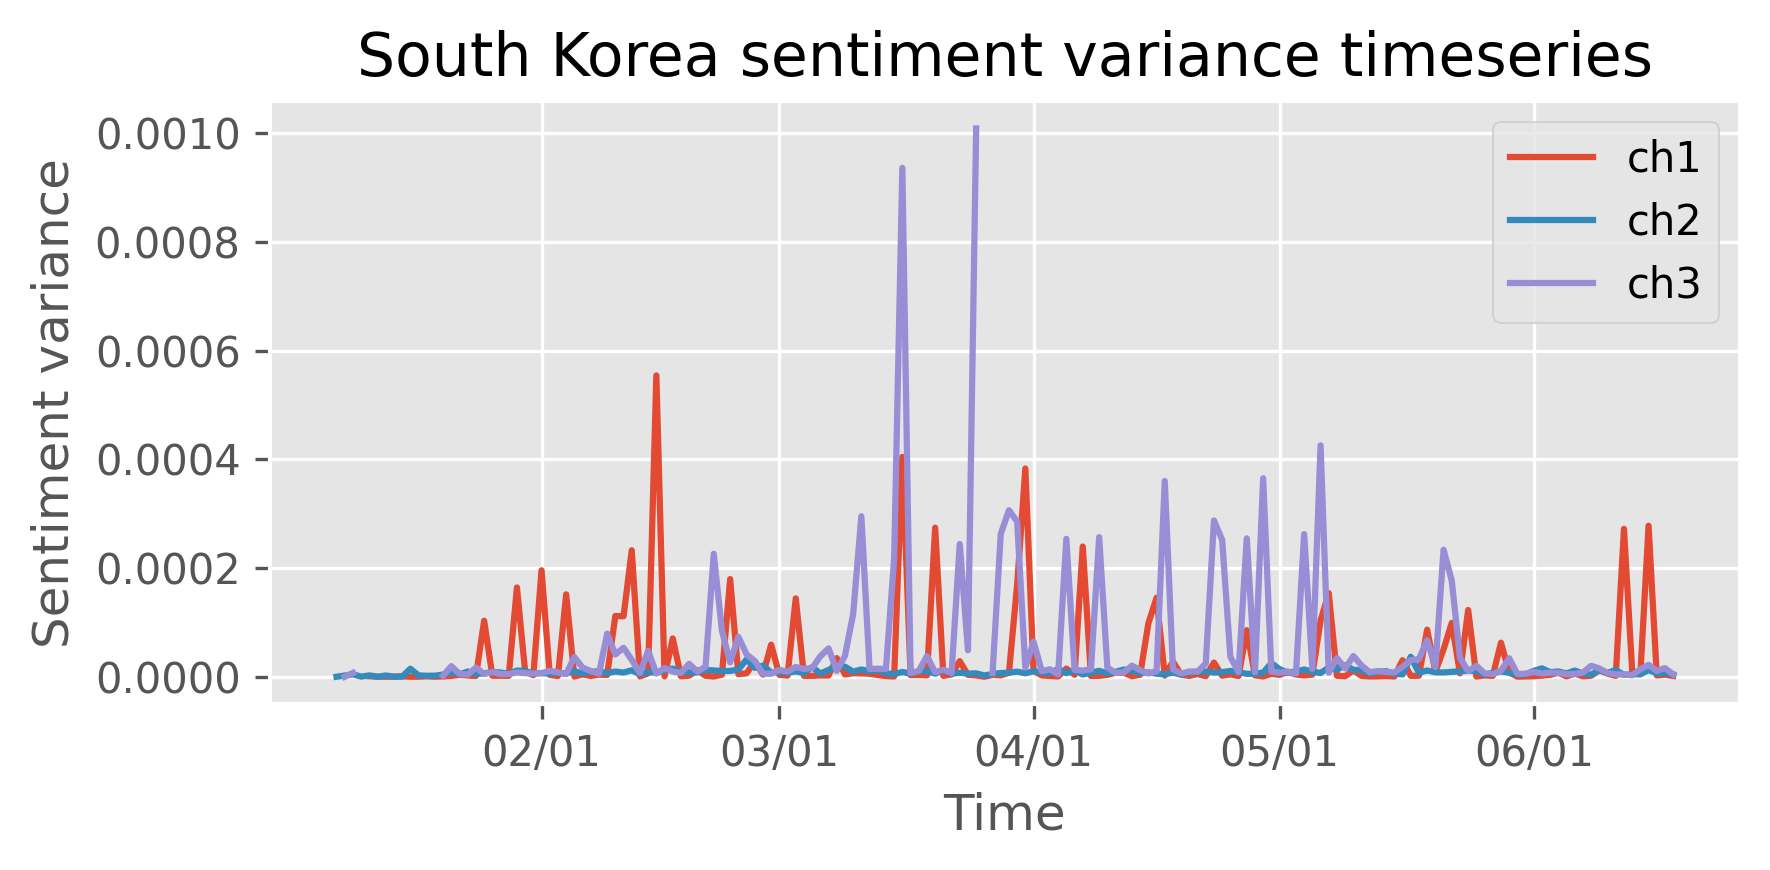

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment variance')
plt.title('South Korea sentiment variance timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chvars:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/KOR_timeseries_var.png')

# Australia

In [ ]:
sourcedict = {}
sepdict = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_Australia/sentiment Australia/sentiment folder/*.csv'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          if urli[2] not in sourcedict.keys():
            sourcedict[urli[2]]=[sentiment]
            sepdict[urli[2]]=[(pf,nf)]
          else:
            sourcedict[urli[2]].append(sentiment)
            sepdict[urli[2]].append((pf,nf))

sentavgs, ncount = [],[]
avgdict = {}
for key, value in sourcedict.items():
  if len(value)>0:
    sentavgs.append(np.average(value))
    ncount.append(len(value))
    avgdict[key] = np.average(value)

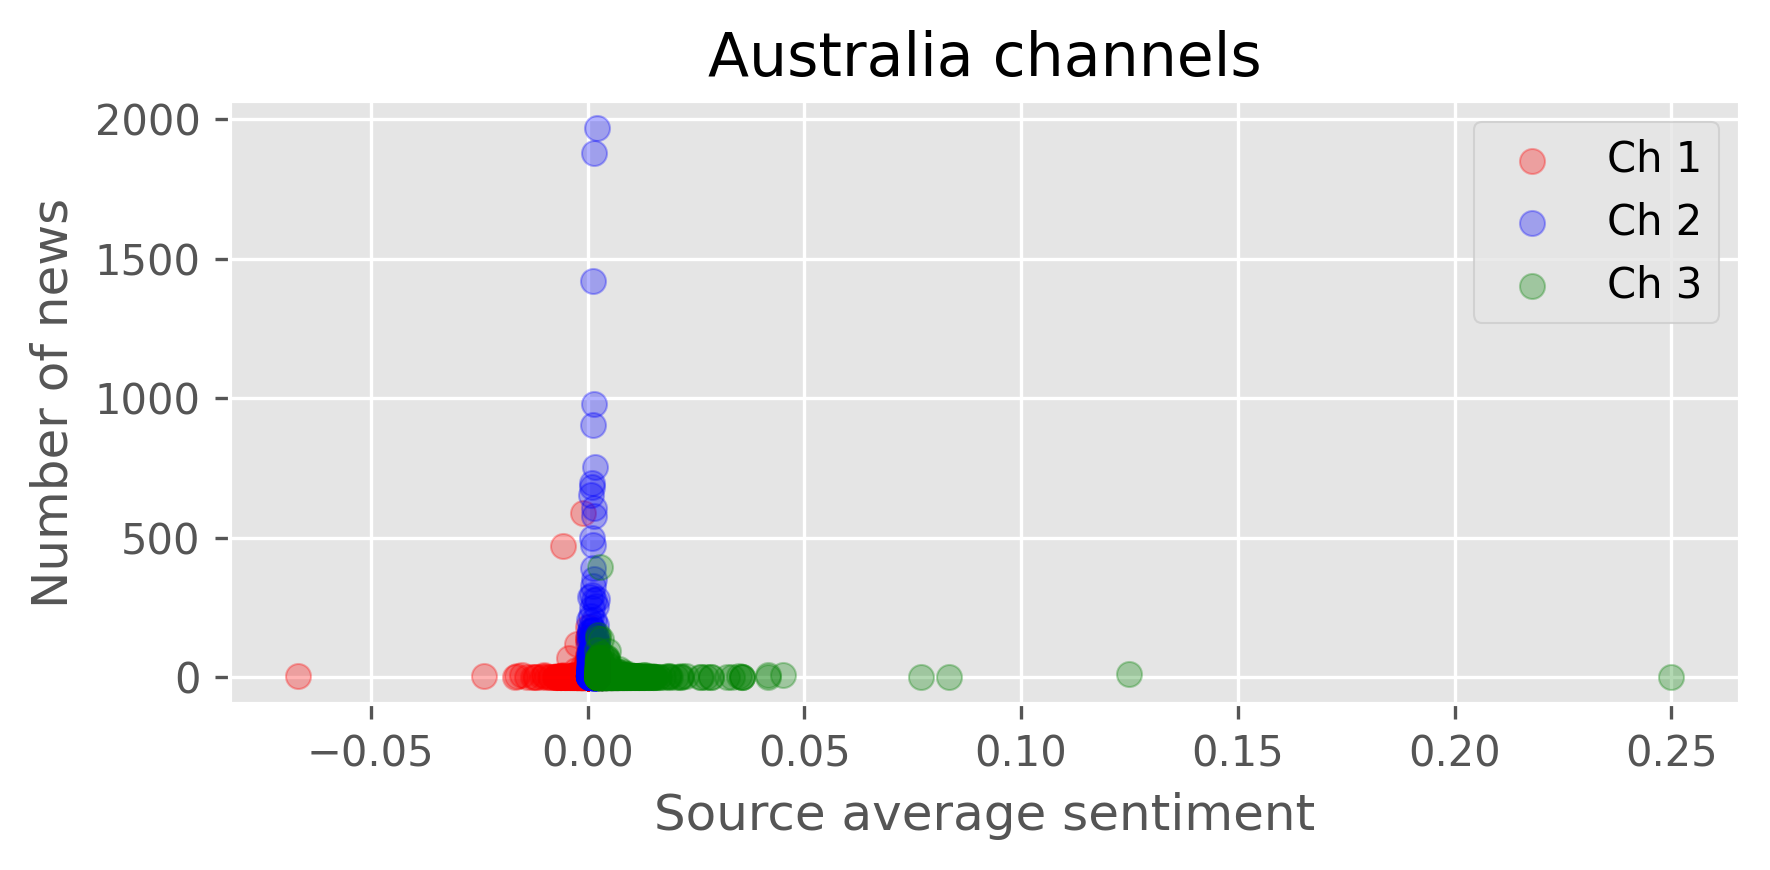

In [ ]:
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
plt.style.use('ggplot')
sortorder = np.argsort(sentavgs)
plt.figure(figsize=(6,3), dpi=300)
plt.scatter([sentavgs[i] for i in sortorder][:b1],[ncount[i] for i in sortorder][:b1], alpha=0.3, c='r', label='Ch 1')
plt.scatter([sentavgs[i] for i in sortorder][b1:b2],[ncount[i] for i in sortorder][b1:b2], alpha=0.3, c='b', label='Ch 2')
plt.scatter([sentavgs[i] for i in sortorder][b2:],[ncount[i] for i in sortorder][b2:], alpha=0.3, c='g', label='Ch 3')
plt.xlabel('Source average sentiment')
plt.ylabel('Number of news')
plt.legend()
plt.title('Australia channels')
plt.tight_layout()

plt.savefig('drive/My Drive/AUS_channels.png')

In [ ]:
'''
Binning the channels into 3 + expert

'''
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
sortdict = {k: v for k, v in sorted(avgdict.items(), key=lambda item: item[1])}
sourcelist = list(sortdict.keys())
counter = 1
source2ch = {}
for i in range(len(sourcelist)):
  #if sourcelist[i] not in expertchannel:
  source2ch[sourcelist[i]] = counter
  if i > b1*counter:
    counter+=1

#for i in expertchannel:
#  source2ch[i] = 'E'

timelines = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_Australia/sentiment Australia/sentiment folder/*.csv'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Total words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Total words'])#row['Total words']#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          ndate = int(str(row['Date']).replace('filtered_',''))
          if ndate not in timelines.keys():
            timelines[ndate] = {'E':[],1:[],2:[],3:[]}
          timelines[ndate][source2ch[urli[2]]].append(sentiment)

with open('drive/My Drive/AUS_channels.json', 'w') as fp:
  json.dump(timelines, fp)

#Save the avgs etc.

sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/AUS_processed.csv')

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


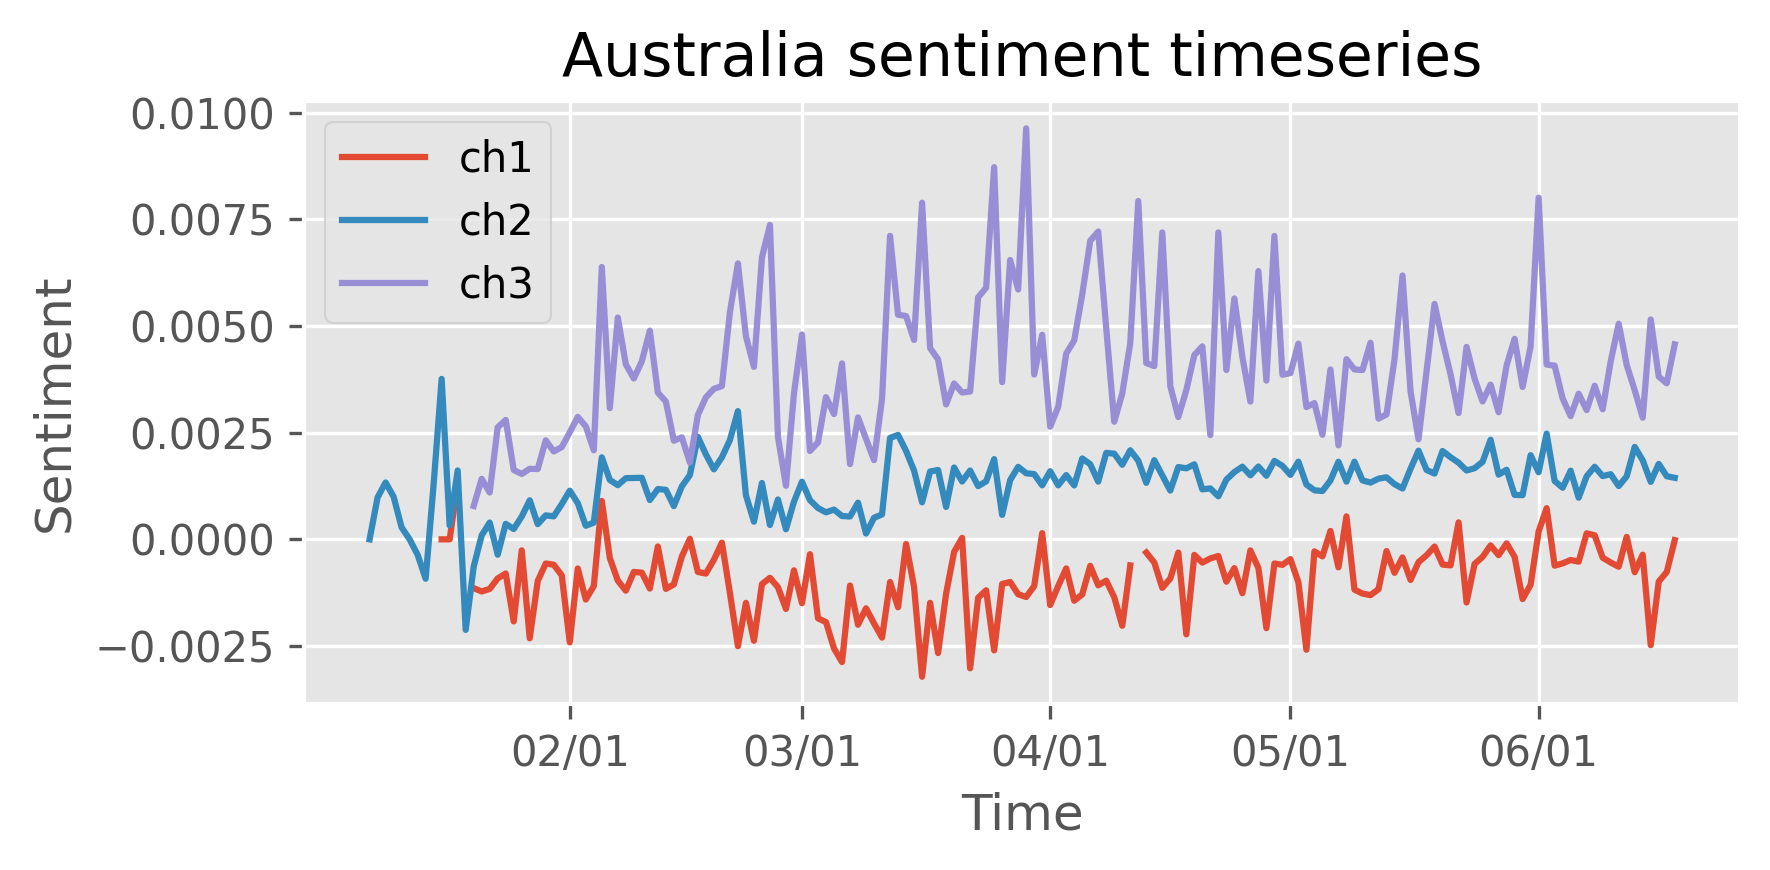

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Australia sentiment timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chavgs:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/AUS_timeseries.png')

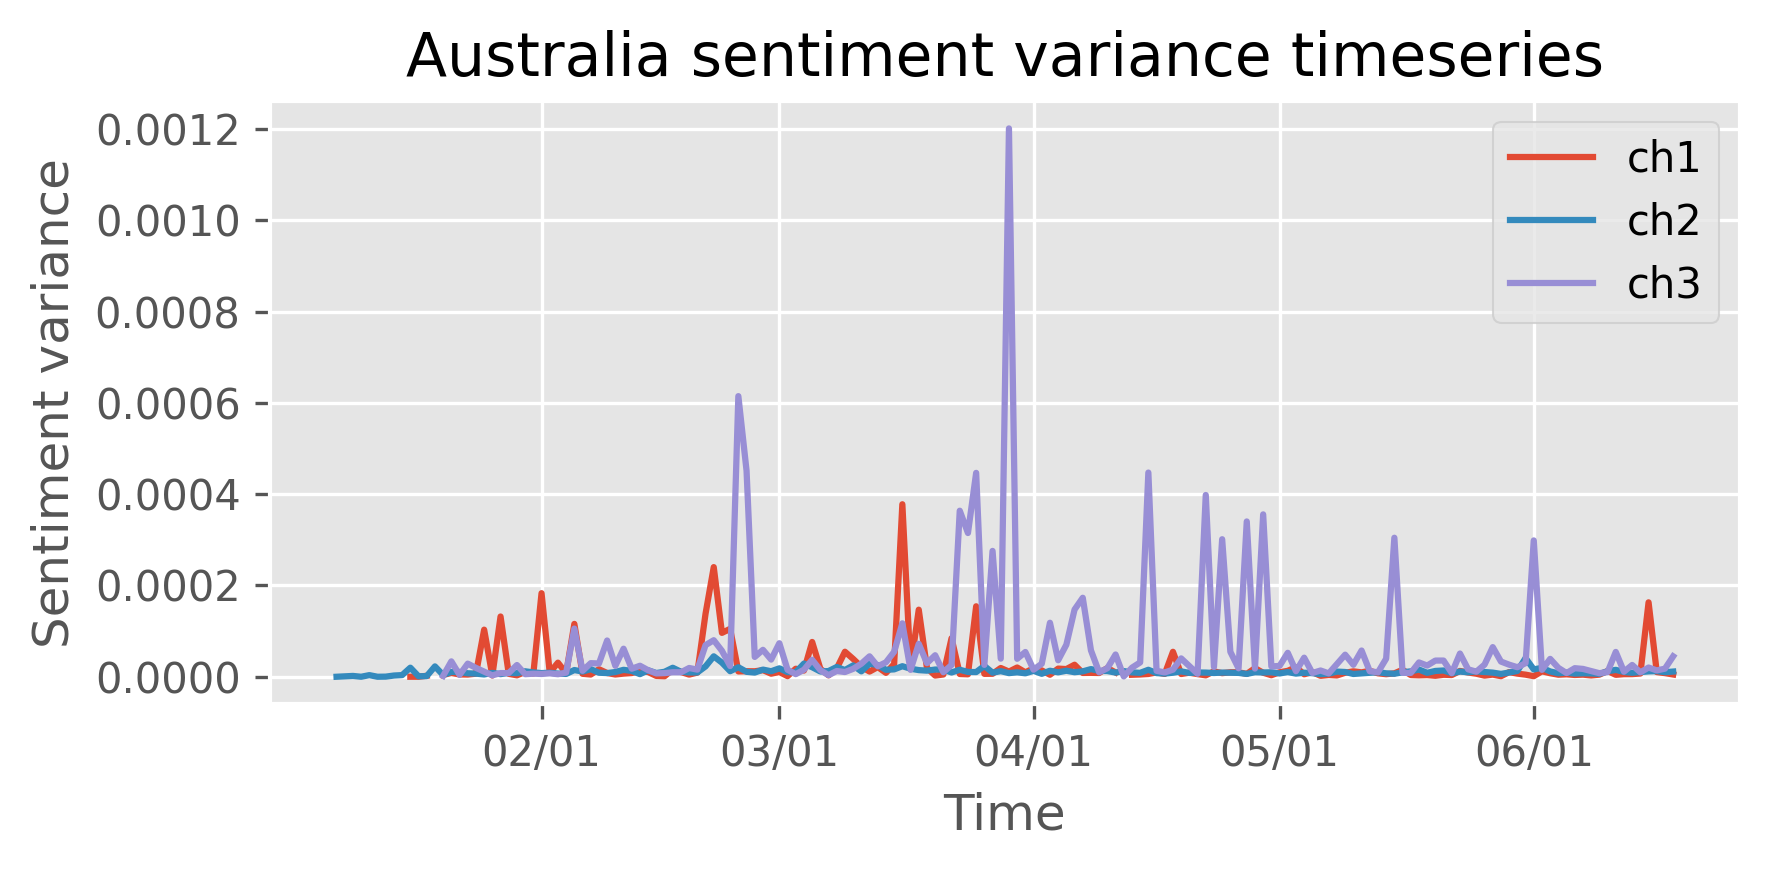

In [ ]:
plt.figure(figsize=(6,3), dpi=300)
plt.xlabel('Time')
plt.ylabel('Sentiment variance')
plt.title('Australia sentiment variance timeseries')
chlabels = ['exp','ch1','ch2','ch3']
lblc =0
for i in chvars:
  if lblc != 0:
    plt.plot(np.arange(len(i)), i, label=chlabels[lblc])
  lblc+=1
plt.legend()
ticks = []
ticklabels = []
for i in range(len(sortedtimeline)):
  if str(sortedtimeline[i])[-2:] == '01':
    ticks.append(i)
    ticklabels.append(str(sortedtimeline[i])[-4:-2]+'/'+str(sortedtimeline[i])[-2:])
plt.xticks(ticks,ticklabels)

plt.tight_layout()
plt.savefig('drive/My Drive/AUS_timeseries_var.png')

#Brazil

In [ ]:
sourcedict = {}
sepdict = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Sentiment Analysis Material-BR,IN,IR,SA/Data/Brazil/Sentiment_Result/*/BR_GDELT*.csv'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep=',')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Positve Words']+row['Negative Words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Positve Words']+row['Negative Words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          if urli[2] not in sourcedict.keys():
            sourcedict[urli[2]]=[sentiment]
            sepdict[urli[2]]=[(pf,nf)]
          else:
            sourcedict[urli[2]].append(sentiment)
            sepdict[urli[2]].append((pf,nf))

sentavgs, ncount = [],[]
avgdict = {}
for key, value in sourcedict.items():
  if len(value)>0:
    sentavgs.append(np.average(value))
    ncount.append(len(value))
    avgdict[key] = np.average(value)

TypeError: ignored

In [ ]:
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
plt.style.use('ggplot')
sortorder = np.argsort(sentavgs)
plt.figure(figsize=(6,3), dpi=300)
plt.scatter([sentavgs[i] for i in sortorder][:b1],[ncount[i] for i in sortorder][:b1], alpha=0.3, c='r', label='Ch 1')
plt.scatter([sentavgs[i] for i in sortorder][b1:b2],[ncount[i] for i in sortorder][b1:b2], alpha=0.3, c='b', label='Ch 2')
plt.scatter([sentavgs[i] for i in sortorder][b2:],[ncount[i] for i in sortorder][b2:], alpha=0.3, c='g', label='Ch 3')
plt.xlabel('Source average sentiment')
plt.ylabel('Number of news')
plt.legend()
plt.title('Brazil channels')

In [ ]:
'''
Binning the channels into 3 + expert

'''
bbins = np.floor(len(sentavgs)/3)
b1 = int(bbins)
b2 = int(bbins)*2
sortdict = {k: v for k, v in sorted(avgdict.items(), key=lambda item: item[1])}
sourcelist = list(sortdict.keys())
counter = 1
source2ch = {}
for i in range(len(sourcelist)):
  if sourcelist[i] not in expertchannel:
    source2ch[sourcelist[i]] = counter
  if i > b1*counter:
    counter+=1

for i in expertchannel:
  source2ch[i] = 'E'

timelines = {}
for i in glob(r'/content/drive/Shared drives/FNA XN Spring 2020 Project 4/Data/COVID-19 GDELT Articles and Result (GM, US,SK,AS)/Updated Sentiment Analysis Data and Result (Article Based)/2020_Australia/sentiment Australia/sentiment folder/*.csv'):
  #with open(i, 'r') as readfile:
  #print(i)
  df = pd.read_csv(i, header=0, sep='\t')
  for index, row in df.iterrows():
    urli = row['URL']
    if not pd.isnull(urli):
      urli = urli.split('/')
      if len(urli)>2:
        if (row['Positve Words']+row['Negative Words'])!=0:
          sentiment = (row['Positve Words']-row['Negative Words'])/(row['Positve Words']+row['Negative Words'])#row['Total words']
          pf = (row['Positve Words'])/(row['Total words'])
          nf = (row['Negative Words'])/(row['Total words'])
          ndate = int(str(row['Date']).replace('filtered_',''))
          if ndate not in timelines.keys():
            timelines[ndate] = {'E':[],1:[],2:[],3:[]}
          timelines[ndate][source2ch[urli[2]]].append(sentiment)

with open('drive/My Drive/BRA_channels.json', 'w') as fp:
  json.dump(timelines, fp)

#Save the avgs etc.

sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/BRA_processed.csv')

# India

#Iran

#South Africa

#Timeseries for each channel

In [ ]:
'''sortedtimeline = sorted(list(timelines.keys()))
channelaverages = []
channelvariances = []
for d in sortedtimeline:
  exp = timelines[d]['E']
  ch1 = timelines[d][1]
  ch2 = timelines[d][2]
  ch3 = timelines[d][3]
  channelaverages.append([np.average(exp), np.average(ch1), np.average(ch2), np.average(ch3)])
  channelvariances.append([np.var(exp), np.var(ch1), np.var(ch2), np.var(ch3)])

chvars = np.asarray(channelvariances).T
chavgs = np.asarray(channelaverages).T
tmpdf = pd.DataFrame({'Date':sortedtimeline, 'E_mean':chavgs[0], 'ch1_mean':chavgs[1], 'ch2_mean':chavgs[2], 'ch3_mean':chavgs[3], 'E_var':chvars[0], 'ch1_var':chvars[1], 'ch2_var':chvars[2], 'ch3_var':chvars[3], })

tmpdf.to_csv('drive/My Drive/AUS_processed.csv')'''